# 通货膨胀税拉弗曲线  

## 概览

我们在非线性模型版本中研究通货膨胀税率的静态和动态*拉弗曲线*，该模型在 {doc}`money_inflation`中进行了研究。

我们使用了{cite}`Cagan`在他的经典论文中使用的货币需求函数的对数线性版本，而不是在 {doc}`money_inflation` 中使用的线性需求函数。

这一改变要求我们修改部分分析内容。

特别是，我们的动态系统在状态变量上不再是线性的。

然而，基于我们所谓的“方法2”的经济逻辑分析仍然没有改变。

我们将发现与我们在 {doc}`money_inflation` 中研究的结果类似的质量结果。

该讲座展示了本讲座中模型的线性版本。

就像在那次讲座中，我们讨论了以下主题：

* 政府通过印制纸币或电子货币收集的**通货膨胀税**
* 在通货膨胀税率中有两个静态均衡的动态**拉弗曲线**
* 在理性预期下的反常动态，系统趋向于较高的静态通货膨胀税率
* 与该静态通货膨胀率相关的奇特的比较静态状态分析，它声称通货膨胀可以通过运行*更高*的政府赤字来*降低*

这些结果将为分析 {doc}`laffer_adaptive` 做准备，该分析研究了现有模型的一个版本，该版本使用了一种“适应性预期”而不是理性预期。

该讲座将展示

* 用适应性预期替代理性预期保持了两个静态通货膨胀率不变，但是$\ldots$
* 它通过使*较低*的静态通货膨胀率成为系统通常收敛的结果，逆转了反常动态
* 现在通货膨胀可以通过运行*较低*的政府赤字来*降低*，从而出现了更为合理的比较动态结果)

## 模型

设定

* $m_t$ 为时间 $t$ 开始时货币供应量的对数
* $p_t$ 为时间 $t$ 时的价格水平对数

货币的需求函数为：

$$
m_{t+1} - p_t = -\alpha (p_{t+1} - p_t)
$$ (eq:mdemand)

其中 $\alpha \geq 0$。

货币供应量的运动规律为：

$$
\exp(m_{t+1}) - \exp(m_t) = g \exp(p_t)
$$ (eq:msupply)

其中 $g$ 是政府支出中通过印钞方式筹资的部分。

**备注：** 请注意，虽然公式 {eq}`eq:mdemand` 在货币供应量和价格水平的对数上是线性的，但公式 {eq}`eq:msupply` 在水平上是线性的。这将需要适应我们在 {doc}`money_inflation` 中部署的均衡计算方法。

## 通货膨胀率的限制值

我们可以通过研究稳态拉弗曲线来计算 $\overline \pi$ 的两个潜在限制值。

因此，在*稳态*中

$$
m_{t+1} - m_t = p_{t+1} - p_t =  x \quad \forall t ,
$$

其中 $x > 0$ 是货币供应量和价格水平的对数的公共增长率。

几行代数运算可以得出 $x$ 满足的以下方程

$$
\exp(-\alpha x) - \exp(-(1 + \alpha) x) = g 
$$ (eq:steadypi)

我们需要满足

$$
g \leq \max_{x \geq 0} \{\exp(-\alpha x) - \exp(-(1 + \alpha) x) \},  
$$ (eq:revmax)

以便通过印钞来融资是可行的。

{eq}`eq:steadypi`的左侧是通过印钞所筹集的稳态收入。

{eq}`eq:steadypi`的右侧是政府通过印钞筹集的时间 $t$ 商品的数量。

不久我们将绘制方程{eq}`eq:steadypi`的左右两侧。

但首先我们将编写计算稳态 $\overline \pi$ 的代码。

让我们从导入一些库开始

In [1]:
from collections import namedtuple
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
from scipy.optimize import fsolve 

FONTPATH = "fonts/SourceHanSerifSC-SemiBold.otf"
mpl.font_manager.fontManager.addfont(FONTPATH)
plt.rcParams['font.family'] = ['Source Han Serif SC']

让我们创建一个`namedtuple`来存储模型的参数

In [2]:
CaganLaffer = namedtuple('CaganLaffer', 
                        ["m0",  # t=0时货币供应量的对数
                         "α",   # 货币需求的灵敏度
                         "λ",
                         "g" ])

# 创建一个Cagan Laffer模型
def create_model(α=0.5, m0=np.log(100), g=0.35):
    return CaganLaffer(α=α, m0=m0, λ=α/(1+α), g=g)

model = create_model()

现在我们编写计算稳态$\overline \pi$的代码。

In [3]:
# 定义π_bar的公式
def solve_π(x, α, g):
    return np.exp(-α * x) - np.exp(-(1 + α) * x) - g

def solve_π_bar(model, x0):
    π_bar = fsolve(solve_π, x0=x0, xtol=1e-10, args=(model.α, model.g))[0]
    return π_bar

# 求解两个稳态的π
π_l = solve_π_bar(model, x0=0.6)
π_u = solve_π_bar(model, x0=3.0)
print(f'两个稳态的π是: {π_l, π_u}')

两个稳态的π是: (0.6737147075333032, 1.6930797322614812)


我们找到两个稳态$\overline \pi$的值。

## 稳态拉弗曲线

以下图形展示了稳态拉弗曲线以及两个稳态通货膨胀率。

<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:16: SyntaxWarning: invalid escape sequence '\p'
<>:23: SyntaxWarning: invalid escape sequence '\p'
/tmp/ipykernel_5906/2347328394.py:16: SyntaxWarning: invalid escape sequence '\p'
  for π, label in zip(πs, ['$\pi_l$', '$\pi_u$']):
/tmp/ipykernel_5906/2347328394.py:16: SyntaxWarning: invalid escape sequence '\p'
  for π, label in zip(πs, ['$\pi_l$', '$\pi_u$']):
/tmp/ipykernel_5906/2347328394.py:23: SyntaxWarning: invalid escape sequence '\p'
  plt.xlabel('$\pi$')


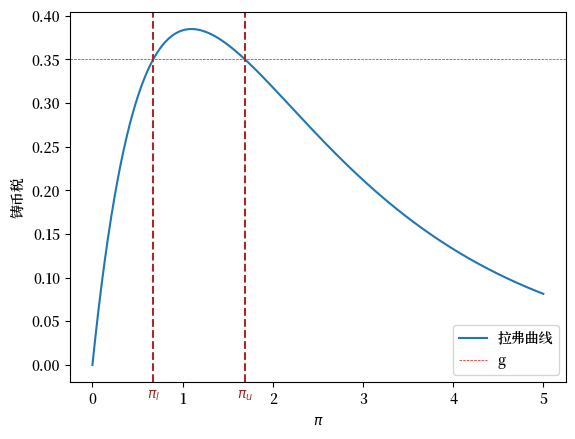

In [4]:
def compute_seign(x, α):
    return np.exp(-α * x) - np.exp(-(1 + α) * x)

def plot_laffer(model, πs):
    α, g = model.α, model.g
    
    # 生成 π 值
    x_values = np.linspace(0, 5, 1000)

    # 计算对应的铸币税值
    y_values = compute_seign(x_values, α)

    # 绘制函数
    plt.plot(x_values, y_values, 
            label=f'拉弗曲线')
    for π, label in zip(πs, ['$\pi_l$', '$\pi_u$']):
        plt.text(π, plt.gca().get_ylim()[0]*2, 
                 label, horizontalalignment='center',
                 color='brown', size=10)
        plt.axvline(π, color='brown', linestyle='--')
    plt.axhline(g, color='red', linewidth=0.5, 
                linestyle='--', label='g')
    plt.xlabel('$\pi$')
    plt.ylabel('铸币税')
    plt.legend()
    plt.show()

# 稳态拉弗曲线
plot_laffer(model, (π_l, π_u))

## 初始价格水平

现在我们已经掌握了两个可能的稳态，我们可以计算两个函数 $\underline p(m_0)$ 和
$\overline p(m_0)$，作为时间 $t$ 时 $p_t$ 的初始条件，意味着对于所有 $t \geq 0$ 有 $\pi_t = \overline \pi$。

函数 $\underline p(m_0)$ 将会与较低的稳态通货膨胀率 $\pi_l$ 关联。

函数 $\overline p(m_0)$ 将会与较高的稳态通货膨胀率 $\pi_u$ 关联。

In [5]:
def solve_p0(p0, m0, α, g, π):
    return np.log(np.exp(m0) + g * np.exp(p0)) + α * π - p0

def solve_p0_bar(model, x0, π_bar):
    p0_bar = fsolve(solve_p0, x0=x0, xtol=1e-20, args=(model.m0, 
                                                       model.α, 
                                                       model.g, 
                                                       π_bar))[0]
    return p0_bar

# 计算与 π_l 和 π_u 关联的两个初始价格水平
p0_l = solve_p0_bar(model, 
                    x0=np.log(220), 
                    π_bar=π_l)
p0_u = solve_p0_bar(model, 
                    x0=np.log(220), 
                    π_bar=π_u)
print(f'关联的初始 p_0s 是: {p0_l, p0_u}')

关联的初始 p_0s 是: (5.615742247288047, 7.144789784380314)


### 验证

首先，让我们编写一些代码来验证，如果初始对数价格水平 $p_0$ 取我们刚刚计算的两个值之一，那么通货膨胀率 $\pi_t$ 将对所有的 $t \geq 0$ 保持恒定。

下面的代码进行了验证。

In [6]:
# 实现上述伪代码
def simulate_seq(p0, model, num_steps):
    λ, g = model.λ, model.g
    π_seq, μ_seq, m_seq, p_seq = [], [], [model.m0], [p0]

    for t in range(num_steps):
        
        m_seq.append(np.log(np.exp(m_seq[t]) + g * np.exp(p_seq[t])))
        p_seq.append(1/λ * p_seq[t] + (1 - 1/λ) * m_seq[t+1])

        μ_seq.append(m_seq[t+1]-m_seq[t])
        π_seq.append(p_seq[t+1]-p_seq[t])

    return π_seq, μ_seq, m_seq, p_seq

In [7]:
π_seq, μ_seq, m_seq, p_seq = simulate_seq(p0_l, model, 150)

# 在稳态下检查 π 和 μ
print('π_bar == μ_bar:', π_seq[-1] == μ_seq[-1])

# 检查稳态下的 m_{t+1} - m_t 和 p_{t+1} - p_t
print('m_{t+1} - m_t:', m_seq[-1] - m_seq[-2])
print('p_{t+1} - p_t:', p_seq[-1] - p_seq[-2])

# 检验 exp(-αx) - exp(-(1 + α)x) = g
eq_g = lambda x: np.exp(-model.α * x) - np.exp(-(1 + model.α) * x)

print('eq_g == g:', np.isclose(eq_g(m_seq[-1] - m_seq[-2]), model.g))

π_bar == μ_bar: True
m_{t+1} - m_t: 1.693079732261424
p_{t+1} - p_t: 1.693079732261424
eq_g == g: True


## 计算均衡序列

我们将采用类似于 {doc}`money_inflation` 中的 *方法2*。

我们将时间 $t$ 的状态向量视为对 $(m_t, p_t)$。

我们将 $m_t$ 视为一个 ``自然状态变量``，而 $p_t$ 视为一个 ``跳跃`` 变量。

定义

$$
\lambda \equiv \frac{\alpha}{1 + \alpha}
$$

让我们重写方程 {eq}`eq:mdemand` 成为

$$
p_t = (1-\lambda) m_{t+1} + \lambda p_{t+1}
$$ (eq:mdemand2)

我们将用以下伪代码总结我们的算法。

**伪代码**

伪代码的核心在于迭代下面的映射：从时间 $t$ 的状态向量 $(m_t, p_t)$
到时间 $t+1$ 的状态向量 $(m_{t+1}, p_{t+1})$。

* 从给定的一对 $(m_t, p_t)$ 在时间 $t \geq 0$ 开始

  * 解决 {eq}`eq:msupply` 得到 $m_{t+1}$

  * 解决 {eq}`eq:mdemand2` 得到 $p_{t+1} = \lambda^{-1} p_t + (1 - \lambda^{-1}) m_{t+1}$

  * 计算通货膨胀率 $\pi_t = p_{t+1} - p_t$ 和货币供应增长率 $\mu_t = m_{t+1} - m_t$

接下来，计算上述描述的两个函数 $\underline p(m_0)$ 和 $\overline p(m_0)$

现在开始如下算法。

  * 设置 $m_0 >0$
  * 在区间 $[\underline p(m_0), \overline p(m_0)]$ 中选择一个 $p_0$ 的值，并在时间 $t=0$ 形成一对 $(m_0, p_0)$
  
从 $(m_0, p_0)$ 开始，迭代 $t$ 直到 $\pi_t \rightarrow \overline \pi$ 和 $\mu_t \rightarrow \overline \mu$ 收敛

结果将表明：

* 如果它们存在，极限值 $\overline \pi$ 和 $\overline \mu$ 将是相等的

* 如果极限值存在，有两个可能的极限值，一个高，一个低

* 对于几乎所有初始对数价格水平 $p_0$，极限 $\overline \pi = \overline \mu$ 是更高的值

* 对于两个可能的极限值 $\overline \pi$ 中的每一个，存在一个独特的初始对数价格水平 $p_0$，它意味着所有 $t \geq 0$ 的 $\pi_t = \mu_t = \overline \mu$

  * 这个独特的初始对数价格水平解决了 $\log(\exp(m_0) + g \exp(p_0)) - p_0 = - \alpha \overline \pi$

  * 上述关于 $p_0$ 的方程源自 $m_1 - p_0 = - \alpha \overline \pi$
  
## 拉弗曲线动态的滑动面

我们现在已装备好用不同的 $p_0$ 设置来计算时间序列，就像在{doc}`money_inflation`中的设置。

In [8]:
def draw_iterations(p0s, model, line_params, p0_bars, num_steps):

    fig, axes = plt.subplots(4, 1, figsize=(8, 10), sharex=True)
    
    # 预先计算时间步
    time_steps = np.arange(num_steps) 
    
    # 在对数刻度上绘制前两个y轴
    for ax in axes[:2]:
        ax.set_yscale('log')

    # 遍历 p_0s 并计算一系列的 y_t
    for p0 in p0s:
        π_seq, μ_seq, m_seq, p_seq = simulate_seq(p0, model, num_steps)

        # 绘制 m_t
        axes[0].plot(time_steps, m_seq[1:], **line_params)

        # 绘制 p_t
        axes[1].plot(time_steps, p_seq[1:], **line_params)
        
        # 绘制 π_t
        axes[2].plot(time_steps, π_seq, **line_params)
        
        # 绘制 μ_t
        axes[3].plot(time_steps, μ_seq, **line_params)
    
    # 绘制标签
    axes[0].set_ylabel('$m_t$')
    axes[1].set_ylabel('$p_t$')
    axes[2].set_ylabel('$\pi_t$')
    axes[3].set_ylabel('$\mu_t$')
    axes[3].set_xlabel('时间步')
    
    for p_0, label in [(p0_bars[0], '$p_0=p_l$'), (p0_bars[1], '$p_0=p_u$')]:
        y = simulate_seq(p_0, model, 1)[0]
        for ax in axes[2:]:
            ax.axhline(y=y[0], color='grey', linestyle='--', lw=1.5, alpha=0.6)
            ax.text(num_steps * 1.02, y[0], label, verticalalignment='center', 
                         color='grey', size=10)
    
    # 强制整数轴标签
    axes[3].xaxis.set_major_locator(MaxNLocator(integer=True))

    plt.tight_layout()
    plt.show()

<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\m'
<>:31: SyntaxWarning: invalid escape sequence '\p'
<>:32: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_5906/1698525305.py:31: SyntaxWarning: invalid escape sequence '\p'
  axes[2].set_ylabel('$\pi_t$')
/tmp/ipykernel_5906/1698525305.py:32: SyntaxWarning: invalid escape sequence '\m'
  axes[3].set_ylabel('$\mu_t$')


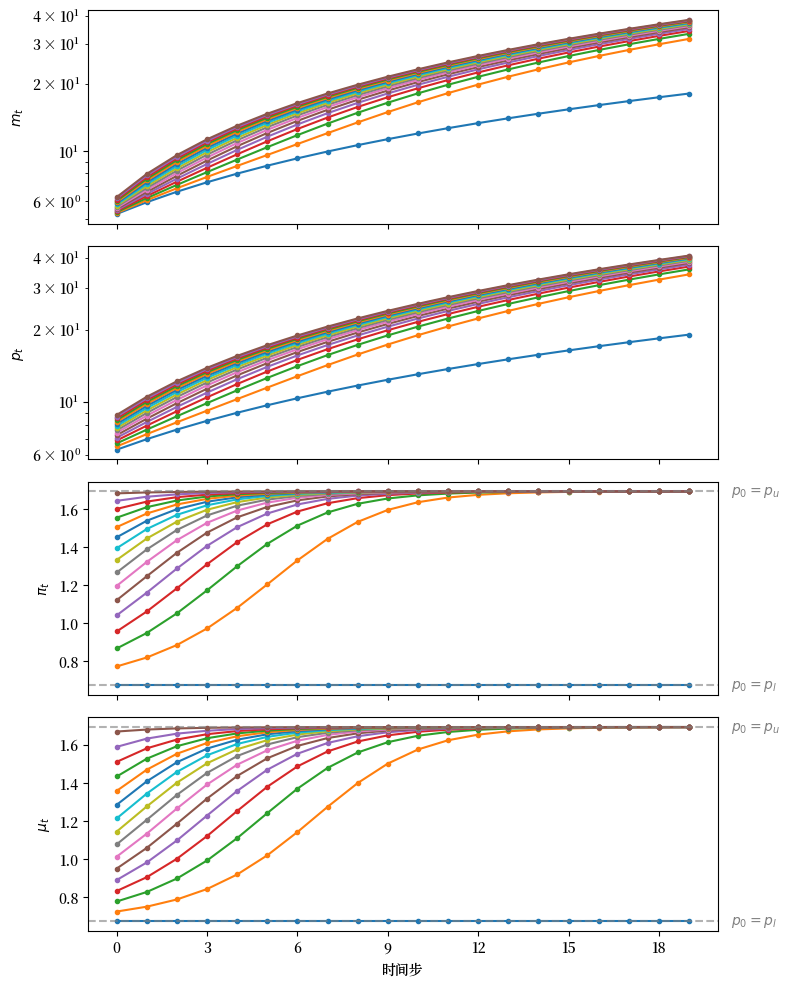

In [9]:
# 从 p0_l 到 p0_u 生成一个序列
p0s = np.arange(p0_l, p0_u, 0.1) 

line_params = {'lw': 1.5, 
              'marker': 'o',
              'markersize': 3}

p0_bars = (p0_l, p0_u)
              
draw_iterations(p0s, model, line_params, p0_bars, num_steps=20)

盯着 {numref}`p0_path_nonlin` 中的价格水平路径，发现几乎所有路径都趋向于在固定状态拉佛曲线中显示的*更高*的通货膨胀税率。如图 {numref}`laffer_curve_nonlinear` 中显示。

因此，我们重新确认了我们所称的“反常”动态，在理性预期下，系统会趋向于两个可能的固定通货膨胀税率中较高的一个。

这种动态之所以被称为“反常”，不仅仅是因为它们意味着货币和财政当局选择通过通货膨胀税来资助政府开支，而且是由于我们通过盯着图 {numref}`laffer_curve_nonlinear` 中的固定状态拉佛曲线可以推断出的以下“违反直觉”的情况：

* 图表显示，通过运行*更高*的政府赤字，即通过增加印钞筹集更多资源，可以*降低*通货膨胀。

```{note}
在 {doc}`money_inflation` 中研究的模型的线性版本中也普遍存在同样的定性结果。
```

我们发现：

* 所有但一个的均衡路径趋向于较高的两个可能的固定通货膨胀税率
* 存在一个与关于政府赤字减少如何影响固定通货膨胀率的“合理”声明相关的独特均衡路径

正如 {doc}`money_inflation` 中所述，
出于合理性的考虑，我们再次推荐选择趋向于较低固定通货膨胀税率的独特均衡。

正如我们将看到的，接受这个建议是我们在 {doc}`unpleasant` 中描述的“不愉快算术”结果的关键成分。

在 {doc}`laffer_adaptive` 中，我们将探讨 {cite}`bruno1990seigniorage` 和其他人是如何以其他方式为我们的均衡选择提供理由的。